<a href="https://colab.research.google.com/github/kameshDiviyanjana/DL-Lab-5/blob/main/IT21155352_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [3]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [5]:


# Load Data
file_path = '/content/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [6]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [7]:
# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [8]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=60, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=60, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=30, batch_size=42, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.4339
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1335
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1406
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1082
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1000
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1008
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0930
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0997
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1049
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0905
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0911
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0895
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0906
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0938
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0961
Epoch 16/30
4/4 ━━━━━━━━━━━━━━

In [12]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step


In [13]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

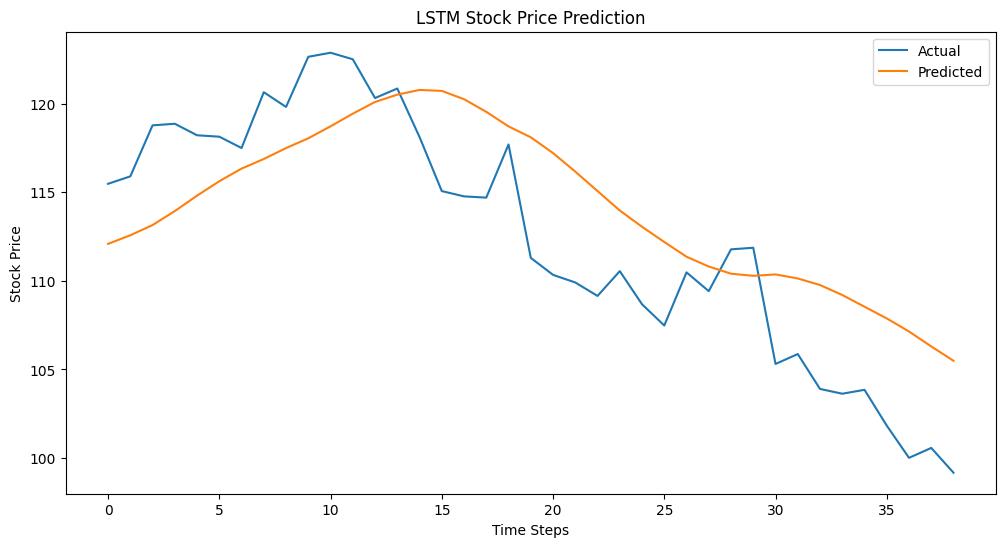

In [14]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()

*3. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?**

 above graph show


1.** What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?**
The purpose of normalizing the 'Close' prices before feeding them into the LSTM model is to scale the data to a smaller range, typically between 0 and 1. This helps improve the model's performance by ensuring that all input features are on a similar scale, which can lead to faster convergence during training and improved accuracy. Normalization also helps prevent large values from dominating the learning process, making the training process more stable.

2.** What is the purpose of the Dropout layer in the LSTM model?**
The purpose of the Dropout layer in the LSTM model is to prevent overfitting by randomly setting a fraction of the input units to zero during training. This forces the model to not rely too heavily on any single neuron and encourages it to learn more robust features that generalize better to unseen data. Dropout helps improve the model's ability to perform well on new data, rather than just memorizing the training data.

